In [6]:
!python -m pip install paddlepaddle-gpu==2.0.0 -i https://mirror.baidu.com/pypi/simple
!pip install paddleocr --upgrade
!pip install paddlepaddle
!git clone https://github.com/PaddlePaddle/PaddleOCR

Looking in indexes: https://mirror.baidu.com/pypi/simple
ERROR: Could not find a version that satisfies the requirement paddlepaddle-gpu==2.0.0 (from versions: 2.3.0, 2.3.1, 2.3.2, 2.4.0rc0, 2.4.0, 2.4.1, 2.4.2, 2.5.0rc0, 2.5.0rc1, 2.5.0, 2.5.1, 2.5.2, 2.6.0)
ERROR: No matching distribution found for paddlepaddle-gpu==2.0.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00
fatal: destination path 'PaddleOCR' already exists and is not an empty directory.


Import

In [1]:
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import cv2 #opencv
import os # folder directory navigation

In [2]:
ocr_model = PaddleOCR(lang='en')

[2024/02/20 05:43:58] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [3]:
result = ocr_model.ocr('/content/FrontPage_Passport.jpg')

[2024/02/20 05:43:59] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/02/20 05:44:00] ppocr DEBUG: dt_boxes num : 28, elapsed : 0.7101049423217773
[2024/02/20 05:44:03] ppocr DEBUG: rec_res num  : 28, elapsed : 3.6294286251068115


In [4]:
result

[[[[[430.0, 21.0], [1211.0, 24.0], [1211.0, 66.0], [430.0, 62.0]],
   ('HR IURTGY/REPUBLIC OF INDIA', 0.8335916996002197)],
  [[[515.0, 105.0], [650.0, 111.0], [649.0, 149.0], [513.0, 143.0]],
   ('/Typ', 0.7930366396903992)],
  [[[743.0, 105.0], [880.0, 109.0], [879.0, 144.0], [742.0, 140.0]],
   ('ts/Code', 0.9190062880516052)],
  [[[974.0, 104.0], [1211.0, 108.0], [1211.0, 142.0], [974.0, 138.0]],
   ('/Nationality', 0.7336125373840332)],
  [[[774.0, 151.0], [845.0, 151.0], [845.0, 190.0], [774.0, 190.0]],
   ('IND', 0.9954690337181091)],
  [[[962.0, 142.0], [1231.0, 146.0], [1230.0, 189.0], [961.0, 185.0]],
   ('HRd/INDIAN', 0.8635076284408569)],
  [[[565.0, 152.0], [595.0, 152.0], [595.0, 189.0], [565.0, 189.0]],
   ('P', 0.916959822177887)],
  [[[1285.0, 168.0], [1630.0, 159.0], [1631.0, 206.0], [1287.0, 215.0]],
   ('W4688947', 0.9916166067123413)],
  [[[574.0, 208.0], [769.0, 210.0], [768.0, 239.0], [574.0, 237.0]],
   ('/Sumame', 0.8809515833854675)],
  [[[579.0, 261.0], [774.

In [5]:
context = ''
for res in result[0]:
    # print(res[1][0])
    context += res[1][0]
print(context)

HR IURTGY/REPUBLIC OF INDIA/Typts/Code/NationalityINDHRd/INDIANPW4688947/SumameDAYAKAR/GenNamesSANTHOSH/Sex/Date of Birth15/11/2002MPlace of BirthCHENNAI TAMIL NADU/Pace of lssueCHENNAISourdiongfDate of issueDate of E01/09/202231/08/2032P<INDDAYAKAR<<SANTHOSH<<<<<<<<<<<<<<<<<<<<<<W4688947<01ND0211152M32083132064494813922<68


In [6]:
boxes = [res[0] for res in result[0]] #
texts = [res[1][0] for res in result[0]]
scores = [res[1][1] for res in result[0]]

In [7]:
img = cv2.imread('/content/FrontPage_Passport.jpg')

# reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [8]:
font_path = '/content/PaddleOCR/StyleText/fonts/en_standard.ttf'

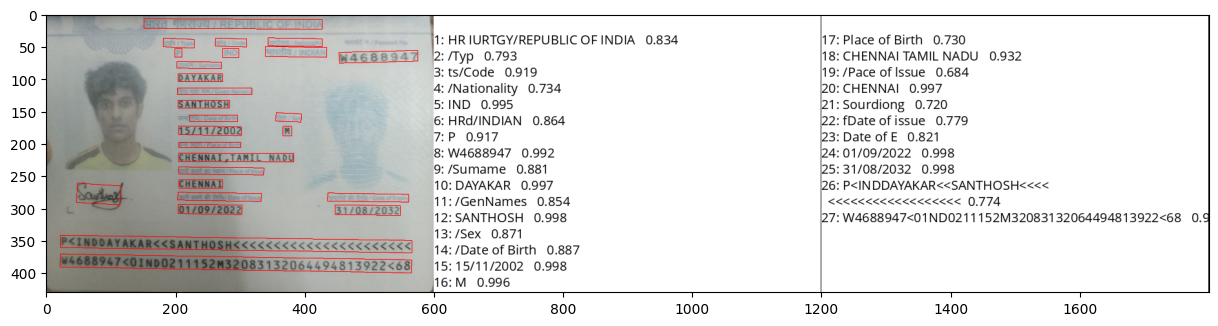

In [9]:
plt.figure(figsize=(15,15))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path = font_path)

# show the image using matplotlib
plt.imshow(annotated)